### Install and Import yfinance library 

In [1]:
pip install --upgrade --user yfinance

In [2]:
import yfinance as yf 

### Enable to download price history(ticker)

In [3]:
sp500 = yf.Ticker("^GSPC")

### Historical prices 

In [4]:
sp500 = sp500.history(period = "max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,0.0,0.0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,0.0,0.0
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-20 00:00:00-04:00', '2023-06-21 00:00:00-04:00',
               '2023-06-22 00:00:00-04:00', '2023-06-23 00:00:00-04:00',
               '2023-06-26 00:00:00-04:00', '2023-06-27 00:00:00-04:00',
               '2023-06-28 00:00:00-04:00', '2023-06-29 00:00:00-04:00',
               '2023-06-30 00:00:00-04:00', '2023-07-03 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23990, freq=None)

### Cleaning and visualizing stock market data

<AxesSubplot:xlabel='Date'>

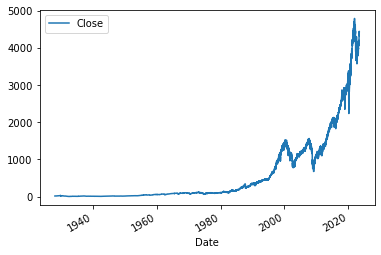

In [7]:
sp500.plot.line(y = "Close", use_index = True)

### Removing unwanted columns(for this project) dividends and stock splits which can be used for individual stocks but not for index

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

### Setting up target for machine learning ( and in our case it will be whether the stock price will go up or down)

In [9]:
sp500["Tommorow"] = sp500["Close"].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883


In [11]:
sp500["Target"] = (sp500["Tommorow"] > sp500["Close"]).astype("int")

In [12]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863,0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1


### Taking a subset of the whole data as it might result in the incorrect decision making because the market could have been shifted fundamentally over the past years 

In [13]:
sp500 = sp500.loc["1990-01-01":].copy()

In [14]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863,0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1


### Training an initial machine learning model for which Randomforestclassfier is used due to its resistance to overfit, runs quickly, can encounter non-linear tendencies in the data  

In [15]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [64]:
from sklearn.ensemble import RandomForestClassifier as rfc

model = rfc(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

### Measuring how accurate the model is (through precision score)

In [65]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [66]:
import pandas as pd 
preds = pd.Series(preds , index = test.index)

In [67]:
preds

Date
2023-02-07 00:00:00-05:00    0
2023-02-08 00:00:00-05:00    1
2023-02-09 00:00:00-05:00    1
2023-02-10 00:00:00-05:00    1
2023-02-13 00:00:00-05:00    0
                            ..
2023-06-26 00:00:00-04:00    0
2023-06-27 00:00:00-04:00    1
2023-06-28 00:00:00-04:00    1
2023-06-29 00:00:00-04:00    1
2023-06-30 00:00:00-04:00    1
Length: 100, dtype: int32

In [68]:
precision_score(test["Target"], preds)

0.5833333333333334

### plotting the above result 

<AxesSubplot:xlabel='Date'>

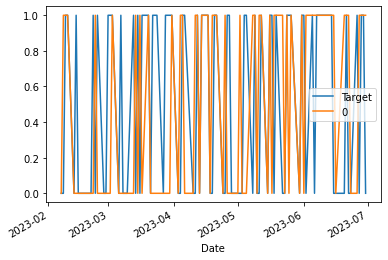

In [69]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

### Building a back testing system

### 1. Creating a prediction function

In [70]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(test["Target"],index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [71]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [77]:
predictions = backtest(sp500, model, predictors)

In [78]:
predictions["Predictions"].value_counts()

1    2686
0    2253
Name: Predictions, dtype: int64

In [80]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.543835
0    0.456165
Name: Target, dtype: float64

### Adding additional predictors to the model 

In [54]:
#Rolling means(mean close price for last 2 days, trading week(5), 60 days , and so on) ratio between todays closing price and rolling mean
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column , trend_column]

In [55]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,Close_ratio2,trend_column,Close_ratio5,...,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,...,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,NaN,NaN,...,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,NaN,NaN,...,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,NaN,0.993731,...,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863,0,1.005695,534.0,1.004078,...,1.005695,1.0,1.004078,2.0,1.043878,32.0,1.093970,118.0,1.156171,534.0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1,0.999823,533.0,1.003208,...,0.999823,1.0,1.003208,2.0,1.042400,31.0,1.092973,118.0,1.155335,533.0
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1,1.002232,533.0,1.007025,...,1.002232,1.0,1.007025,2.0,1.045935,31.0,1.097193,119.0,1.160074,533.0


In [56]:
sp500 = sp500.dropna()

In [57]:
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,Close_ratio2,trend_column,Close_ratio5,...,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,512.0,0.996617,...,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,512.0,0.995899,...,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,513.0,0.999495,...,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,514.0,1.004991,...,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,513.0,1.003784,...,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,4378.410156,1,0.997752,533.0,0.992237,...,0.997752,0.0,0.992237,1.0,1.033400,32.0,1.082182,117.0,1.143499,533.0
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863,0,1.005695,534.0,1.004078,...,1.005695,1.0,1.004078,2.0,1.043878,32.0,1.093970,118.0,1.156171,534.0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1,0.999823,533.0,1.003208,...,0.999823,1.0,1.003208,2.0,1.042400,31.0,1.092973,118.0,1.155335,533.0


### Improving model 

In [59]:
model = rfc(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [60]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(test["Target"],index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [61]:
predictions = backtest(sp500, model, new_predictors)

In [62]:
predictions["Predictions"].value_counts()

1    2686
0    2253
Name: Predictions, dtype: int64